In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df_copy = df.copy(deep=True)

df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

(array([232., 588., 705., 323., 113.,  26.,   6.,   5.,   0.,   2.]),
 array([18.2 , 24.44, 30.68, 36.92, 43.16, 49.4 , 55.64, 61.88, 68.12,
        74.36, 80.6 ]),
 <a list of 10 Patch objects>)

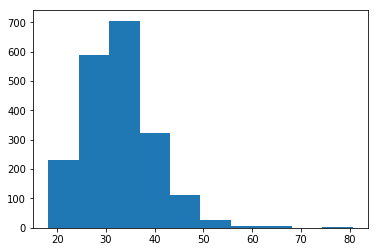

In [3]:
plt.hist(df_copy['BMI'])

In [4]:
y = df_copy['Outcome']
X = df_copy.drop('Outcome',axis=1)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train,y_train)
filename = 'diabetes-predictor.pkl'
pickle.dump(classifier, open(filename,'wb'))

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.985


In [11]:
data = [[9,171,110,24,240,45.4,0.721,54]]
out = classifier.predict(data)
print(out)

[1]
